**SUPPORTLYTICS(MILESTONE 03) BY SAKTHESHWARAN T**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("cleaned_data_supportlytics.csv")

Calculating the average resolution Duration by Ticket type:

In [ ]:
mean_resolution_time = df["Resolution_Duration"].mean()
df["Resolution_Duration"] = df["Resolution_Duration"].fillna(mean_resolution_time)
print("Mean Resolution Duration used for imputation:")
print(round(mean_resolution_time, 2))

overall_avg_resolution = df["Resolution_Duration"].mean()
print("Average Resolution Time (Entire Dataset):")
print(round(overall_avg_resolution, 2))

#  Average Resolution Time by Ticket Type
avg_resolution_by_type = (
    df.groupby("Ticket Type")["Resolution_Duration"]
    .mean()
    .reset_index()
)
print("Average Resolution Time by Ticket Type:")
avg_resolution = avg_resolution_by_type.copy()
avg_resolution["Resolution_Duration"] = avg_resolution["Resolution_Duration"].round(2).astype(str) + " hrs"
print(avg_resolution)

Mean Resolution Duration used for imputation:
7.71
Average Resolution Time (Entire Dataset):
7.71
Average Resolution Time by Ticket Type:
            Ticket Type Resolution_Duration
0       Billing inquiry            7.52 hrs
1  Cancellation request            7.77 hrs
2       Product inquiry            7.75 hrs
3        Refund request            7.82 hrs
4       Technical issue            7.66 hrs


In [ ]:
df.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score,Resolution_Duration
0,1,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Unresolved,Critical,Social media,2023-06-01 12:15:00,NaN,5.5,10.0,7.706034
1,2,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Unresolved,Critical,Chat,2023-06-01 16:45:00,NaN,5.5,10.0,7.706034
2,3,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,2023-06-01 11:14:00,2023-06-01 18:05:00,5.5,1.0,6.850000
3,4,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,2023-06-01 07:29:00,2023-06-01 01:57:00,5.5,1.0,5.533333
4,5,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,2023-06-01 00:12:00,2023-06-01 19:53:00,1.0,1.0,19.683333


Bar chart: Average Resolution Time Vs. Ticket Type

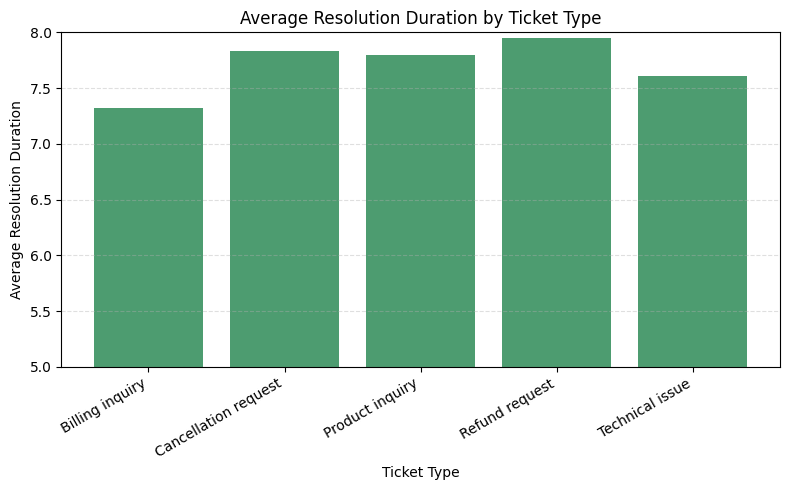

In [ ]:
df["Resolution_Duration"] = pd.to_numeric(df["Resolution_Duration"], errors="coerce")
df_clean = df.dropna(subset=["Resolution_Duration"])

avg_resolution = (
    df_clean.groupby("Ticket Type")["Resolution_Duration"]
    .mean()
    .round(3)
)

plt.figure(figsize=(8, 5))
plt.bar(
    avg_resolution.index,
    avg_resolution.values,
    color="seagreen",
    alpha=0.85
)

plt.ylim(5, 8)
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Duration")
plt.title("Average Resolution Duration by Ticket Type")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


INFERENCE:
> Refund requests have the highest average resolution duration, indicating higher complexity and more verification steps compared to other ticket types.

> Billing inquiries are resolved the fastest, suggesting well-defined processes and efficient handling of such tickets.

Average Resolution Time by Ticket priority:

Average Resolution Duration (in hours):
Medium: 7.26 hrs
Critical: 7.598 hrs
Low: 7.723 hrs
High: 8.246 hrs


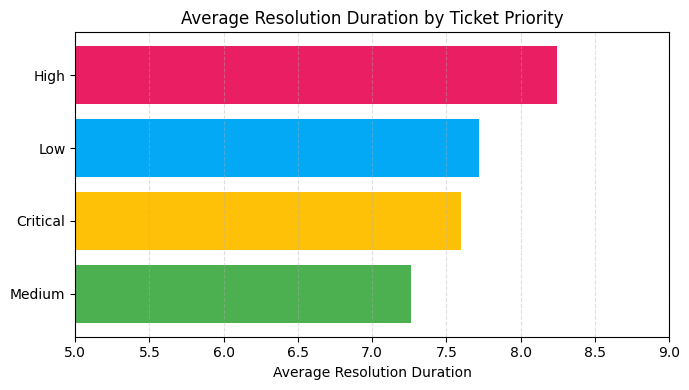

In [ ]:
df["Resolution_Duration"] = pd.to_numeric(df["Resolution_Duration"], errors="coerce")
df = df.dropna(subset=["Resolution_Duration"])

avg_by_priority = (
    df.groupby("Ticket Priority")["Resolution_Duration"]
    .mean()
    .round(3)
    .sort_values()
)

print("Average Resolution Duration (in hours):")
for k, v in avg_by_priority.items():
    print(f"{k}: {v} hrs")

colors = ["#4CAF50", "#FFC107", "#03A9F4", "#E91E63"]

plt.figure(figsize=(7, 4))
plt.barh(avg_by_priority.index, avg_by_priority.values, color=colors)
plt.xlim(5, 9)
plt.xlabel("Average Resolution Duration")
plt.title("Average Resolution Duration by Ticket Priority")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


INFERENCE:
> Medium-priority tickets are handled quickly than the critical and high priority tickets suggesting a handling and performance issue in the IT team.

Average Resolution Duration for High Priority tickets

In [ ]:
df["Resolution_Duration"] = pd.to_numeric(df["Resolution_Duration"], errors="coerce")
df = df.dropna(subset=["Resolution_Duration"])

high_df = df[df["Ticket Priority"].str.lower() == "high"]

avg_high_by_type = (
    high_df.groupby("Ticket Type")["Resolution_Duration"]
    .mean()
    .round(3)
    .sort_values()
)

print("Average Resolution Duration for HIGH Priority Tickets (in hours):")
for k, v in avg_high_by_type.items():
    print(f"{k}: {v} hrs")

Average Resolution Duration for HIGH Priority Tickets (in hours):
Cancellation request: 7.153 hrs
Billing inquiry: 8.093 hrs
Product inquiry: 8.096 hrs
Technical issue: 8.638 hrs
Refund request: 8.955 hrs


PLOT: Resolution Time Vs Ticket Type (High priority Tickets)

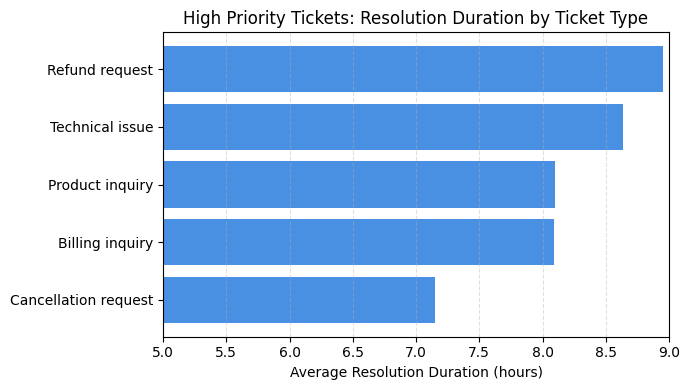

In [ ]:
plt.figure(figsize=(7, 4))
plt.barh(
    avg_high_by_type.index,
    avg_high_by_type.values,
    color="#4A90E2"
)
plt.xlim(5, 9)
plt.xlabel("Average Resolution Duration (hours)")
plt.title("High Priority Tickets: Resolution Duration by Ticket Type")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

INFERENCE:
>  In High priority tickets, A specific ticket type called Cancellation requests are processed faster than the other ticket types such as Billing inquiry, Refund request etc..

PLOT:
*High priority Tickets*: Resolution Time Vs. (Requests vs. incident vs. problem)

High Priority – Average Resolution Duration (hrs):
Incident: 8.638 hrs
Problem: 8.955 hrs
Request: 7.81 hrs




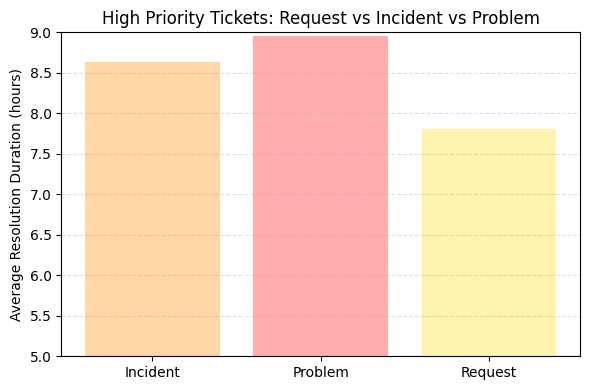

In [ ]:
df["Resolution_Duration"] = pd.to_numeric(df["Resolution_Duration"], errors="coerce")
df = df.dropna(subset=["Resolution_Duration"])

high_df = df[df["Ticket Priority"].str.lower() == "high"]

type_map = {
    "Billing inquiry": "Request",
    "Cancellation request": "Request",
    "Product inquiry": "Request",
    "Technical issue": "Incident",
    "Refund request": "Problem"
}
high_df = high_df.copy()
high_df["Type_Group"] = high_df["Ticket Type"].map(type_map)

avg_grouped = (
    high_df.groupby("Type_Group")["Resolution_Duration"]
    .mean()
    .round(3)
)
print("High Priority – Average Resolution Duration (hrs):")
for k, v in avg_grouped.items():
    print(f"{k}: {v} hrs")
print("\n")

pastel_colors = {
    "Request": "#FFF3B0",
    "Incident": "#FFD6A5",
    "Problem": "#FFADAD"
}
plt.figure(figsize=(6, 4))
plt.bar(
    avg_grouped.index,
    avg_grouped.values,
    color=[pastel_colors[k] for k in avg_grouped.index]
)
plt.ylim(5, 9)
plt.ylabel("Average Resolution Duration (hours)")
plt.title("High Priority Tickets: Request vs Incident vs Problem")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

**UNRESOLVED TICKETS - ANALYSIS**

Identifying Unresolved tickets from the dataset

In [ ]:
unresolved_df = df[
    df["Ticket Status"]
    .str.strip()
    .str.casefold()
    .isin(["unresolved", "open"])
]

print("Unresolved ticket count:", len(unresolved_df))

unresolved_df.head(5)

Unresolved ticket count: 2050


,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score,Resolution_Duration
0,1,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Unresolved,Critical,Social media,2023-06-01 12:15:00,NaN,5.5,10.0,NaN
1,2,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Unresolved,Critical,Chat,2023-06-01 16:45:00,NaN,5.5,10.0,NaN
5,9,60,Other,Fitbit Versa Smartwatch,16-07-2020,Technical issue,Installation support,I'm having an issue with the {product_purchase...,Unresolved,Low,Social media,2023-06-01 10:32:00,NaN,5.5,1.0,NaN
6,10,27,Male,Dyson Vacuum Cleaner,06-03-2020,Refund request,Payment issue,My {product_purchased} is making strange noise...,Unresolved,Critical,Phone,2023-06-01 09:25:00,NaN,5.5,10.0,NaN
9,13,27,Other,Nintendo Switch Pro Controller,26-05-2021,Technical issue,Hardware issue,I'm having an issue with the {product_purchase...,Unresolved,Low,Chat,2023-06-01 19:03:00,NaN,5.5,1.0,NaN


Filtering Unresolved Tickets with high priority

In [ ]:
unresolved_high_df = df[
    (df["Ticket Status"].str.strip() == "Unresolved") &
    (df["Ticket Priority"].str.strip().str.casefold() == "high")
]

print("Unresolved High-Priority ticket count:", len(unresolved_high_df))

unresolved_high_df.head(5)


Unresolved High-Priority ticket count: 494


,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score,Resolution_Duration
12,16,18,Other,GoPro Action Camera,24-06-2021,Billing inquiry,Product recommendation,I'm having an issue with the {product_purchase...,Unresolved,High,Social media,2023-06-01 15:09:00,NaN,5.5,7.0,NaN
14,18,56,Female,Microsoft Xbox Controller,07-09-2020,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Unresolved,High,Chat,2023-06-01 21:05:00,NaN,5.5,7.0,NaN
16,21,28,Other,HP Pavilion,31-05-2021,Refund request,Payment issue,I'm having an issue with the {product_purchase...,Unresolved,High,Chat,2023-06-01 05:08:00,NaN,5.5,7.0,NaN
48,64,57,Female,Adobe Photoshop,24-04-2020,Billing inquiry,Hardware issue,I'm having an issue with the {product_purchase...,Unresolved,High,Phone,2023-06-01 07:07:00,NaN,5.5,7.0,NaN
66,88,55,Other,Philips Hue Lights,10-09-2020,Technical issue,Delivery problem,I'm facing a problem with my {product_purchase...,Unresolved,High,Social media,2023-06-01 19:21:00,NaN,5.5,7.0,NaN


**Line chart : Average resolution Time trend over Time(Monthly)**

/tmp/ipython-input-4261294080.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/tmp/ipython-input-4261294080.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



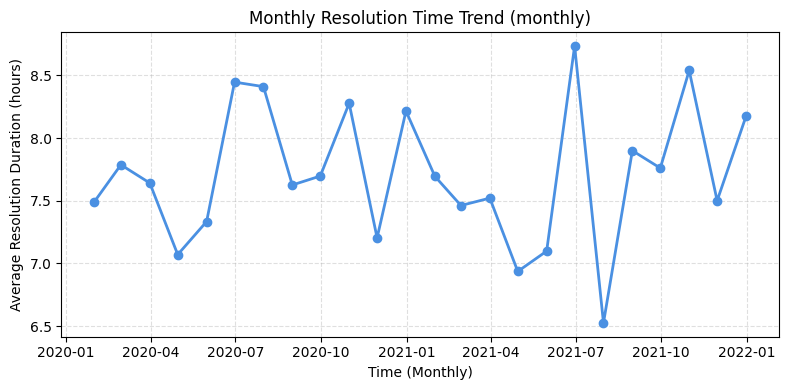

In [159]:
df["Date of Purchase"] = pd.to_datetime(df["Date of Purchase"])
df["Resolution_Duration"] = pd.to_numeric(df["Resolution_Duration"], errors="coerce")

resolved_df = df[
    (df["Ticket Status"].str.strip() == "Closed") &
    (df["Resolution_Duration"].notna())
]

monthly_trend = (
    resolved_df
        .groupby(pd.Grouper(key="Date of Purchase", freq="M"))["Resolution_Duration"]
        .mean()
)

plt.figure(figsize=(8, 4))
plt.plot(
    monthly_trend.index,
    monthly_trend.values,
    marker="o",
    linewidth=2,
    color="#4A90E2"
)

plt.xlabel("Time (Monthly)")
plt.ylabel("Average Resolution Duration (hours)")
plt.title("Monthly Resolution Time Trend (monthly)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


INFERENCE:
>  Line chart shows the trend on how different amount of tickets are resolved on average of different resolution rates over different months.

>  Month of July shows high resolution time spike over other months.

**Bar chart: Unresolved Ticket by Priority**

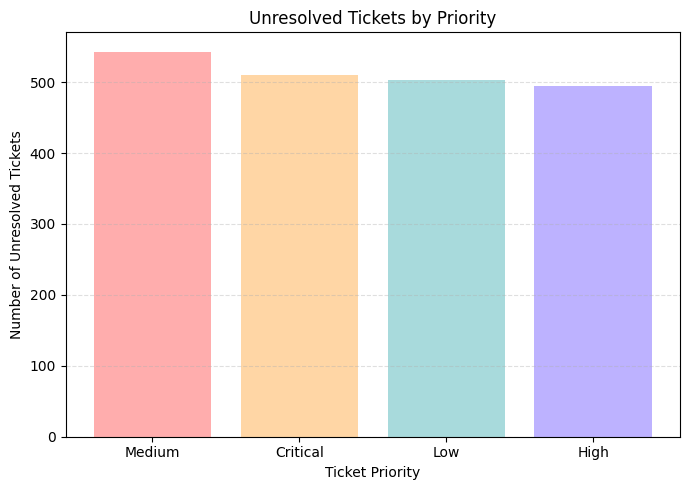

In [ ]:
import matplotlib.pyplot as plt

unresolved_df = df[df["Ticket Status"].str.strip() == "Unresolved"]

priority_counts = unresolved_df["Ticket Priority"].value_counts()

colors = ["#FFADAD", "#FFD6A5", "#A8DADC", "#BDB2FF"]

plt.figure(figsize=(7, 5))
plt.bar(
    priority_counts.index,
    priority_counts.values,
    color=colors[:len(priority_counts)]
)

plt.xlabel("Ticket Priority")
plt.ylabel("Number of Unresolved Tickets")
plt.title("Unresolved Tickets by Priority")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


INFERENCE:
>  Medium-priority tickets have the highest number of unresolved cases, indicating a potential backlog in handling mid-priority issues compared to other priority levels.

**ANALYSIS ACROSS REGIONS**

In [ ]:
df=pd.read_csv("supportlytics_with_geo.csv")
df.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score,Resolution_Duration,Country,Latitude,Longitude
0,1,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Unresolved,Critical,Social media,01-06-2023 12:15,NaN,5.5,10,NaN,Germany,51.1657,10.4515
1,2,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Unresolved,Critical,Chat,01-06-2023 16:45,NaN,5.5,10,NaN,Brazil,-14.2350,-51.9253
2,3,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,5.5,1,6.850000,Australia,-25.2744,133.7751
3,4,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,5.5,1,5.533333,Japan,36.2048,138.2529
4,5,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0,1,19.683333,France,46.2276,2.2137


Average resolution duration across different courtries:

In [160]:
df["Resolution_Duration"] = pd.to_numeric(df["Resolution_Duration"], errors="coerce")

resolved_df = df[
    (df["Ticket Status"].str.strip() == "Closed") &
    (df["Resolution_Duration"].notna())
]

avg_resolution_country = (
    resolved_df
        .groupby("Country")["Resolution_Duration"]
        .mean()
        .round(3)
        .sort_values()
)

avg_resolution_country

,Resolution_Duration
Country,
Japan,7.126
China,7.268
Germany,7.372
Mexico,7.433
United States,7.454
United Kingdom,7.505
Australia,7.530
Singapore,7.546
Canada,7.719


**BAR PLOT: Comparative chart for overall performance across regions**

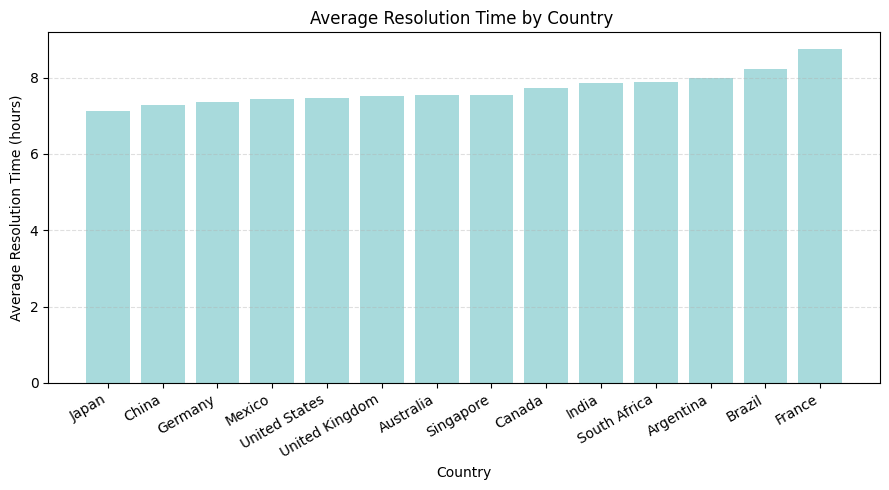

In [ ]:
plt.figure(figsize=(9,5))
plt.bar(
    avg_resolution_country.index,
    avg_resolution_country.values,
    color="#A8DADC"
)

plt.xlabel("Country")
plt.ylabel("Average Resolution Time (hours)")
plt.title("Average Resolution Time by Country ")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


INFERENCE:
> Japan and China show the lowest average resolution times, indicating more efficient ticket handling compared to other countries.

> France and Brazil have the highest resolution times, suggesting potential operational bottlenecks or higher issue complexity in these regions.

STACKED BAR CHART: Ticket categories across regions for high priority tickets

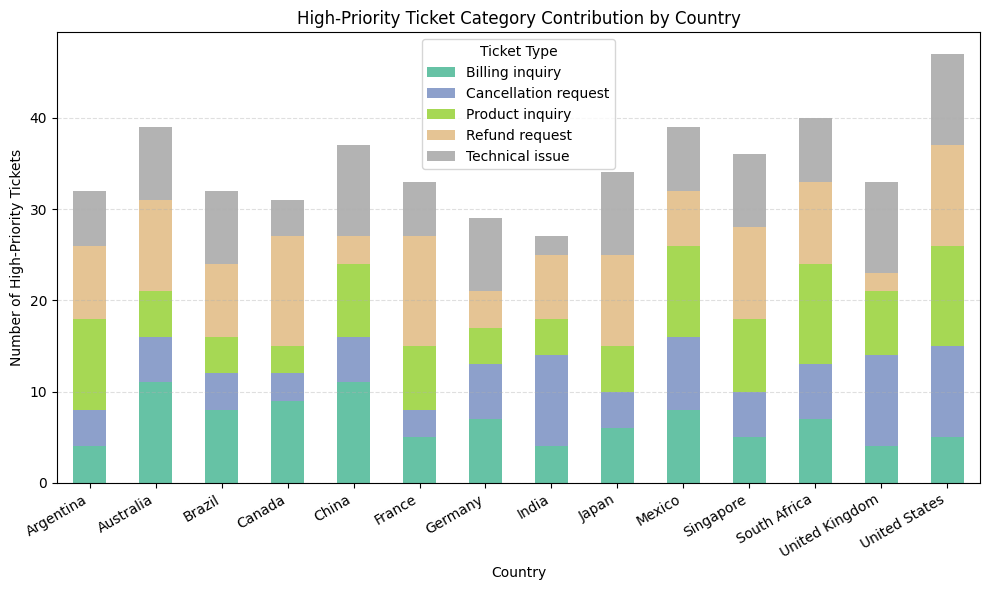

In [ ]:
high_df = df[
    (df["Ticket Priority"].str.casefold() == "high") &
    (df["Ticket Status"].str.strip() == "Closed")
]

stack_data = (
    high_df
        .groupby(["Country", "Ticket Type"])
        .size()
        .unstack(fill_value=0)
)

stack_data.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="Set2"
)

plt.xlabel("Country")
plt.ylabel("Number of High-Priority Tickets")
plt.title("High-Priority Ticket Category Contribution by Country")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


**Comparison plot:** Average resolution time across regions (For high priority tickets)

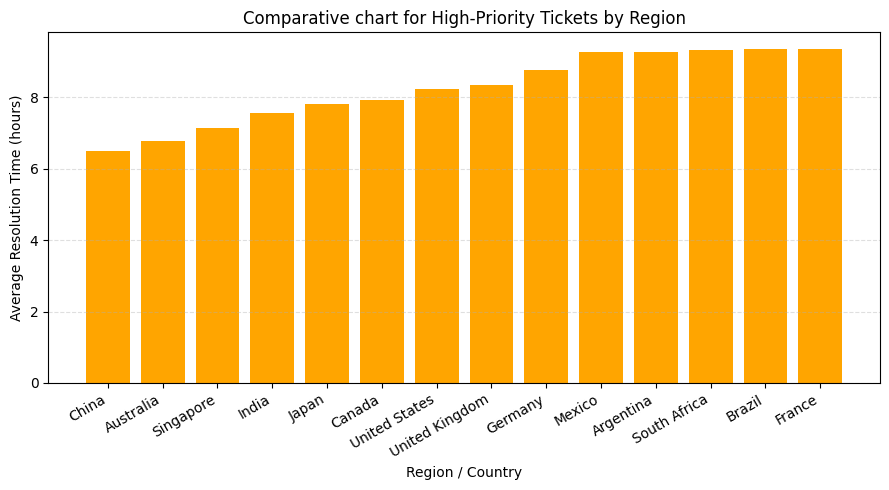

In [ ]:
df["Resolution_Duration"] = pd.to_numeric(df["Resolution_Duration"], errors="coerce")

high_resolved = df[
    (df["Ticket Status"].str.strip() == "Closed") &
    (df["Ticket Priority"].str.casefold() == "high") &
    (df["Resolution_Duration"].notna())
]

avg_high_region = (
    high_resolved
        .groupby("Country")["Resolution_Duration"]
        .mean()
        .round(3)
        .sort_values()
)

plt.figure(figsize=(9,5))
plt.bar(
    avg_high_region.index,
    avg_high_region.values,
    color="#FFA500"   # orange
)

plt.xlabel("Region / Country")
plt.ylabel("Average Resolution Time (hours)")
plt.title("Comparative chart for High-Priority Tickets by Region")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


INFERENCE:
> China handled high priority tickets efficiently with lesser resolution times on contrary with France.

**MODULE 6: GEOGRAPHIC AND CATEGORY LEVEL INSIGHTS**

In [ ]:
df[["Country", "Latitude", "Longitude"]].head()

,Country,Latitude,Longitude
0,Germany,51.1657,10.4515
1,Brazil,-14.2350,-51.9253
2,Australia,-25.2744,133.7751
3,Japan,36.2048,138.2529
4,France,46.2276,2.2137


Calculating ticket count by region:

In [ ]:
ticket_count_country = df["Country"].value_counts()
ticket_count_country

,count
Country,
Singapore,312
Argentina,305
United States,299
Mexico,297
South Africa,294
France,290
India,284
China,283
Brazil,283


In [ ]:
highest_country = ticket_count_country.idxmax()
lowest_country = ticket_count_country.idxmin()
print(f"Country with the Highest Number of Tickets: {highest_country}")
print(f"Country with the Highest Number of Tickets: {lowest_country}")

Country with the Highest Number of Tickets: Singapore
Country with the Highest Number of Tickets: Japan


**HEATMAP: Ticket concentration across regions**

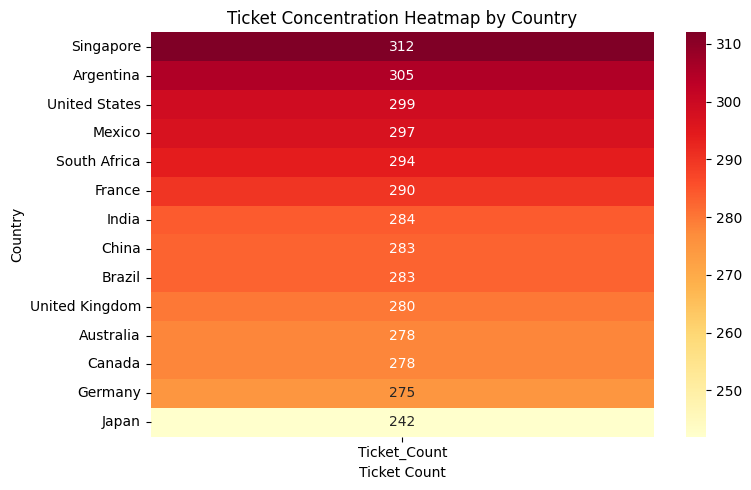

In [ ]:
heatmap_data = ticket_count_country.to_frame(name="Ticket_Count")

plt.figure(figsize=(8,5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    cbar=True
)

plt.title("Ticket Concentration Heatmap by Country")
plt.ylabel("Country")
plt.xlabel("Ticket Count")
plt.tight_layout()
plt.show()


INFERENCE: Singapore accounts for highly concentrated tickets and japan having the least concentration revealing japan handles the IT sector efficiently.

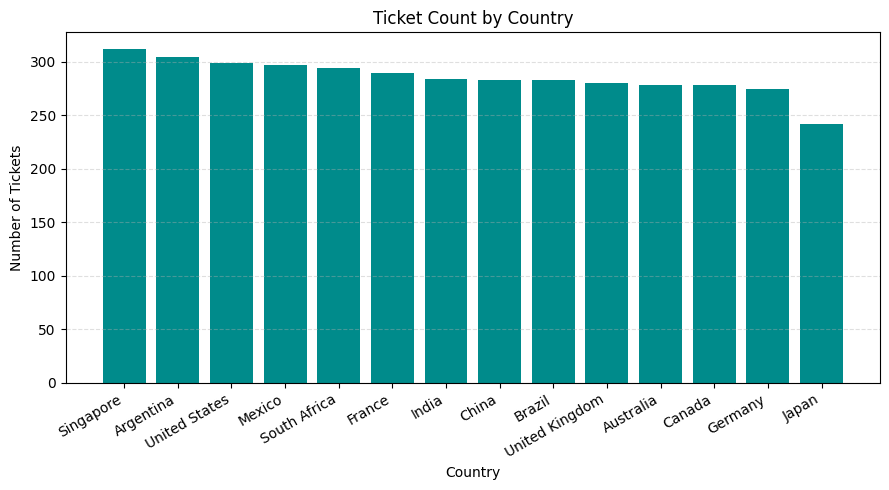

In [ ]:
plt.figure(figsize=(9,5))
plt.bar(
    ticket_count_country.index,
    ticket_count_country.values,
    color="#008B8B"
)

plt.xlabel("Country")
plt.ylabel("Number of Tickets")
plt.title("Ticket Count by Country")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

**CATEGORY LEVEL GEOGRAPHIC ANALYSIS**

Identifying Ticket count by Issue category across various regions


In [ ]:
category_country = (
    df.groupby(["Country", "Ticket Subject"])
      .size()
      .unstack(fill_value=0)
)

category_country

Ticket Subject,Account access,Battery life,Cancellation request,Data loss,Delivery problem,Display issue,Hardware issue,Installation support,Network problem,Payment issue,Peripheral compatibility,Product compatibility,Product recommendation,Product setup,Refund request,Software bug
Country,,,,,,,,,,,,,,,,
Argentina,18,26,19,11,26,15,19,17,17,21,18,22,20,15,23,18
Australia,20,25,14,14,15,19,18,21,10,21,5,25,14,14,18,25
Brazil,15,24,12,18,21,10,19,17,17,18,17,21,11,21,21,21
Canada,17,13,16,9,25,17,23,20,15,18,27,19,14,17,14,14
China,16,19,10,23,14,12,17,17,16,10,24,20,26,21,12,26
France,17,15,16,17,19,17,20,18,17,22,15,18,20,20,24,15
Germany,12,15,18,14,23,15,23,16,21,15,24,17,13,17,17,15
India,21,21,14,12,21,11,18,11,27,23,26,12,10,16,20,21
Japan,17,16,18,9,16,12,10,17,23,14,12,16,16,17,12,17


STACKED BAR CHART: Issue categories distribution across different countries

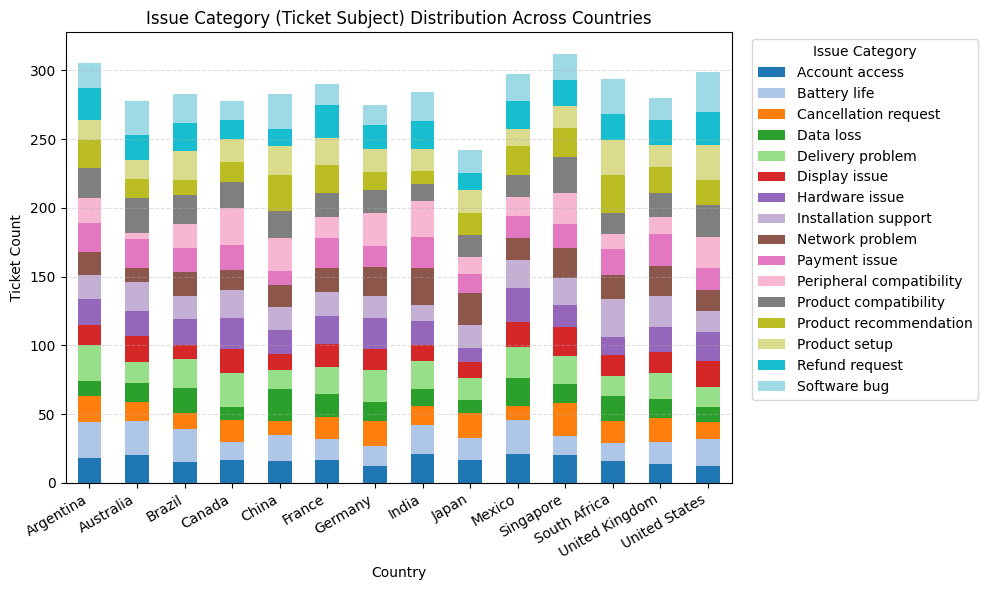

In [ ]:
category_country.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)

plt.xlabel("Country")
plt.ylabel("Ticket Count")
plt.title("Issue Category Distribution Across Countries")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.legend(
    title="Issue Category",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

**CHOROPLETH MAP: DOMINANT TICKET ISSUE CATEGORY ACROSS REGIONS USING GEOSPATIAL ANALYSIS**

In [ ]:
import pandas as pd
import plotly.express as px

# Find dominant issue category per country
dominant_issue = (
    df.groupby(["Country", "Ticket Subject"])
      .size()
      .reset_index(name="count")
      .sort_values(["Country", "count"], ascending=[True, False])
      .drop_duplicates(subset=["Country"])
)

# Choropleth map
fig = px.choropleth(
    dominant_issue,
    locations="Country",
    locationmode="country names",
    color="Ticket Subject",
    hover_name="Country",
    title="Dominant Issue Category by Country(Choropleth Map)",
    projection="natural earth"
)

fig.show()

INFERENCE:
> The choropleth map shows that dominant issue categories vary significantly across countries, indicating region-specific customer and operational challenges.

> Certain issue types such as software bugs, network problems, and refund requests dominate in specific regions, highlighting the need for localized support strategies and targeted issue resolution.

In [161]:
country_summary = (
    df.groupby(["Country", "Latitude", "Longitude", "Ticket Subject"])
      .size()
      .reset_index(name="count")
)

country_summary = (
    country_summary
        .sort_values(["Country", "count"], ascending=[True, False])
        .drop_duplicates(subset=["Country"])
)

fig = px.scatter_geo(
    country_summary,
    lat="Latitude",
    lon="Longitude",
    size="count",
    color="Ticket Subject",
    hover_name="Country",
    size_max=40,
    projection="natural earth",
    title="Global Ticket Distribution: Volume & Issue Categories"
)

fig.show()

Average Resolution Duration across regions:

In [ ]:
df["Resolution_Duration"] = pd.to_numeric(df["Resolution_Duration"], errors="coerce")
df_perf = df.dropna(subset=["Resolution_Duration"])
avg_country_perf = (
    df_perf.groupby("Country")["Resolution_Duration"]
    .mean()
    .round(3)
    .sort_values()
)

avg_country_perf


,Resolution_Duration
Country,
Japan,7.126
China,7.268
Germany,7.372
Mexico,7.433
United States,7.454
United Kingdom,7.505
Australia,7.530
Singapore,7.546
Canada,7.719


PLOT: AVERAGE RESOLUTION TIME Vs. REGIONS

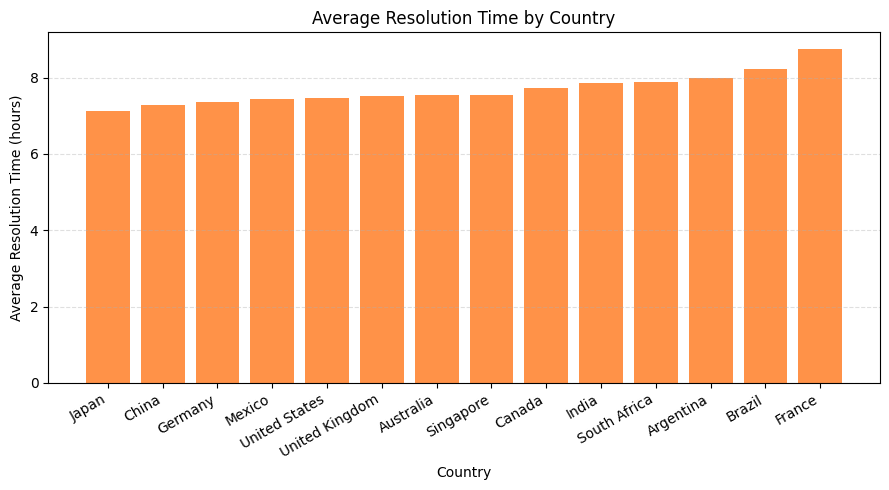

In [ ]:
plt.figure(figsize=(9,5))
plt.bar(
    avg_country_perf.index,
    avg_country_perf.values,
    color="#ff9248"
)

plt.xlabel("Country")
plt.ylabel("Average Resolution Time (hours)")
plt.title("Average Resolution Time by Country")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


HEATMAP: AVERAGE RESOLUTION TIME BY COUNTRY

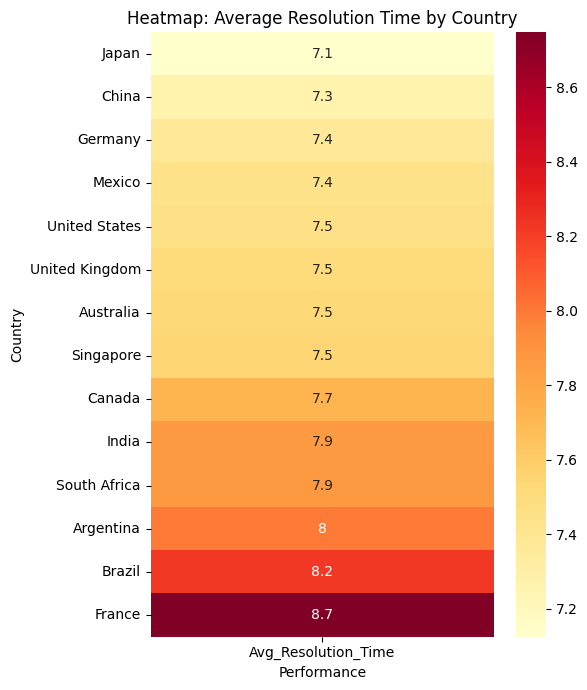

In [ ]:
heatmap_data = avg_country_perf.to_frame(name="Avg_Resolution_Time")

plt.figure(figsize=(6,7))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlOrRd",
    cbar=True
)

plt.title("Heatmap: Average Resolution Time by Country")
plt.ylabel("Country")
plt.xlabel("Performance")
plt.tight_layout()
plt.show()


INEFERENCE: Japan handles the ticket faster by maintaing efficient IT support team than other countries like Canada,brazil and so on.

**Perfomance comparison:**

In [ ]:
ticket_volume = df["Country"].value_counts()
volume_perf = pd.concat(
    [ticket_volume, avg_country_perf],
    axis=1
)
volume_perf.columns = ["Ticket_Count", "Avg_Resolution_Time"]
volume_perf

volume_median = volume_perf["Ticket_Count"].median()
time_median = volume_perf["Avg_Resolution_Time"].median()
efficient_countries = volume_perf[
    (volume_perf["Ticket_Count"] >= volume_median) &
    (volume_perf["Avg_Resolution_Time"] <= time_median)
]
overloaded_countries = volume_perf[
    (volume_perf["Ticket_Count"] >= volume_median) &
    (volume_perf["Avg_Resolution_Time"] > time_median)
]

print("Efficient Operations (High Volume, Low Resolution Time):")
print(efficient_countries)

print("\nOverloaded Operations (High Volume, High Resolution Time):")
print(overloaded_countries)

Efficient Operations (High Volume, Low Resolution Time):
               Ticket_Count  Avg_Resolution_Time
Country                                         
United States           299                7.454
Mexico                  297                7.433

Overloaded Operations (High Volume, High Resolution Time):
              Ticket_Count  Avg_Resolution_Time
Country                                        
Singapore              312                7.546
Argentina              305                7.998
South Africa           294                7.871
France                 290                8.747
India                  284                7.863


INSIGHT:
>  when High volume tickets are handled with less resolution time, the particular country is stated as processing efficient operations.

>  while, High volume tickets are handled with more time, it is considered as Less efficient operation proceeding countries.


Clustering with Ticket Issue categories:

In [153]:
cluster_stats = (
    df_perf.groupby("Ticket Subject")
    .agg(
        Cluster_Size=("Ticket Subject", "count"),
        Avg_Resolution_Time=("Resolution_Duration", "mean")
    )
    .round(3)
    .sort_values("Cluster_Size", ascending=False)
)

cluster_stats


,Cluster_Size,Avg_Resolution_Time
Ticket Subject,,
Product compatibility,149,7.091
Software bug,140,8.115
Network problem,139,7.317
Delivery problem,133,7.072
Product recommendation,132,7.586
Hardware issue,129,8.276
Installation support,122,6.900
Product setup,122,7.334
Battery life,118,8.312


**Scatter plot: Clustering different Issue categories compared with performance impact**

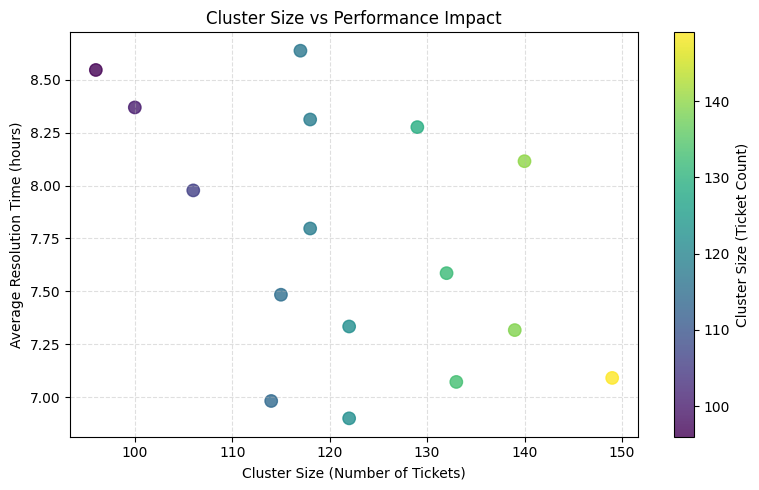

In [158]:
plt.figure(figsize=(8,5))

plt.scatter(
    cluster_stats["Cluster_Size"],
    cluster_stats["Avg_Resolution_Time"],
    c=cluster_stats["Cluster_Size"],
    cmap="viridis",
    s=80,
    alpha=0.8
)

plt.colorbar(label="Cluster Size (Ticket Count)")
plt.xlabel("Cluster Size (Number of Tickets)")
plt.ylabel("Average Resolution Time (hours)")
plt.title("Cluster Size vs Performance Impact")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

INFERENCE:
> Larger issue clusters tend to have moderate to higher average resolution times, indicating that frequently occurring issues place greater strain on support operations.

> Smaller clusters show greater variability in resolution time, suggesting that less frequent issues may be either quickly resolved or require significant effort depending on complexity.

BAR CHART: Average resolution time by Issue clusters

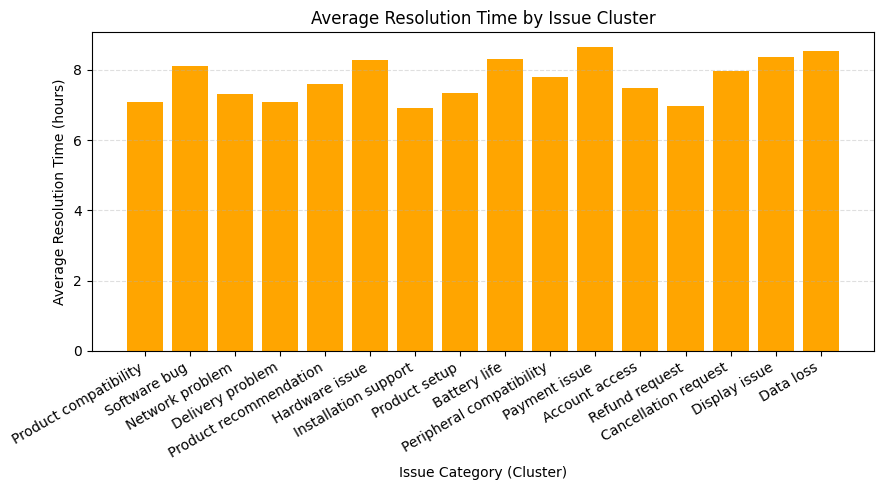

In [155]:
plt.figure(figsize=(9,5))
plt.bar(
    cluster_stats.index,
    cluster_stats["Avg_Resolution_Time"],
    color="#FFA500"
)

plt.xlabel("Issue Category (Cluster)")
plt.ylabel("Average Resolution Time (hours)")
plt.title("Average Resolution Time by Issue Cluster")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


INFERENCE:
> Payment issues, data loss, and display-related problems have the highest average resolution times, indicating greater complexity and longer troubleshooting cycles.

> Installation support and refund-related issues are resolved relatively faster, suggesting more standardized resolution processes for these categories.

**SUMMARY:**
> Payment issues, data loss, and display-related problems have the highest average resolution times, indicating greater complexity and longer troubleshooting cycles.

> Installation support and refund-related issues are resolved relatively faster, suggesting more standardized resolution processes for these categories.